# Supplemental Figures

Kexin Dong, Samuel Gould

Last Update: Jan 23, 2025

NOTE: NEED TO BE FINISHED from old repo analysis 1.

In [ ]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42   
mpl.rcParams['ps.fonttype'] = 42 
mpl.rcParams['text.usetex'] = False 
import bioh2m as h2m
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import requests
import time
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects
import seaborn as sns
from sklearn.decomposition import PCA
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Helvetica']

yellows = sns.color_palette('Oranges').as_hex()
blues   = sns.color_palette('Blues').as_hex()
greens  = sns.color_palette('Greens').as_hex()
reds    = sns.color_palette('Reds').as_hex()
purples = sns.color_palette('Purples').as_hex()

/Users/kexindong/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/kexindong/Library/Python/3.9/lib/python/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [16]:
FOCUSED = pd.read_csv('MBESv2_focused.csv')

# Focused Screen Quality Control

## histogram of gRNA per gene

In [ ]:
FOCUSED = pd.read_csv('MBESv2_focused.csv')

targ_guides = FOCUSED[(FOCUSED['classification']=='targeting guide')] # & (FOCUSED['legacy']==False)]
len(np.unique(targ_guides['gene_name_m']))

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


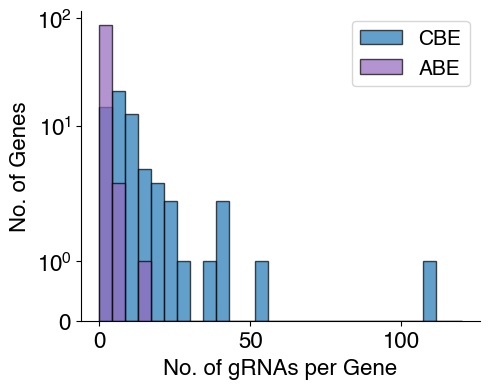

In [ ]:

ABE = targ_guides[targ_guides['Editor']=='ABE']
CBE = targ_guides[targ_guides['Editor']=='CBE']

u, c = np.unique(CBE['gene_name_m'], return_counts=True)
u2, c2 = np.unique(ABE['gene_name_m'], return_counts=True)

#modify this so it's mutations and not guides...
fig, ax = plt.subplots(figsize=(5,4))
ax.hist(c, np.linspace(0,120,29), edgecolor='black', linewidth=1, label='CBE', alpha=.7, color='tab:blue')
ax.hist(c2, np.linspace(0,120,29), edgecolor='black', linewidth=1, label='ABE', alpha=.7, color='tab:purple')

#plt.yscale('log')

#dd = pd.DataFrame(dict(zip(['gene', 'gRNA count'], [u,c]))).sort_values(by='gRNA count', ascending=False)

#plt.plot(list(range(len(dd))), dd['gRNA count'])
ax.set_yscale('symlog')
ax.set_ylabel('No. of Genes', fontsize=16)
ax.set_xlabel('No. of gRNAs per Gene', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16);
ax.set_xticks([0,50,100])
ax.legend(fontsize=15)
ax.spines[['top', 'right']].set_visible(False)
plt.savefig('figures/figure4_focused_gRNA_per_gene_histogram.pdf', bbox_inches='tight')
fig.tight_layout()

In [ ]:
ABE['gene_name_m'].value_counts()

gene_name_m
Trp53     14
Erbb3      7
Smad4      5
Myd88      5
Dnmt3a     4
          ..
Lyn        1
Map2k2     1
Myc        1
Ncoa3      1
Vhl        1
Name: count, Length: 90, dtype: int64

In [12]:
fp = 'counts/focused/'
ABE_BC_COUNTS = pd.read_csv(fp + 'FC_ABE_BC_COUNTS.txt', sep='\t')
ABE_EPO_COUNTS = pd.read_csv(fp + 'FC_ABE_EPO_COUNTS.txt', sep='\t')
# CBE_BC_COUNTS = pd.read_csv(fp + 'CBE_BC_COUNTS.txt', sep='\t')
# CBE_EPO_COUNTS = pd.read_csv(fp + 'CBE_EPO_COUNTS.txt', sep='\t')
ABE_BC_COUNTS = ABE_BC_COUNTS[ABE_BC_COUNTS.columns[2:]]
ABE_EPO_COUNTS = ABE_EPO_COUNTS[ABE_EPO_COUNTS.columns[2:]]
# CBE_EPO_COUNTS = CBE_EPO_COUNTS[CBE_EPO_COUNTS.columns[2:]]
# CBE_BC_COUNTS = CBE_BC_COUNTS[CBE_BC_COUNTS.columns[2:]]

## PCA

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


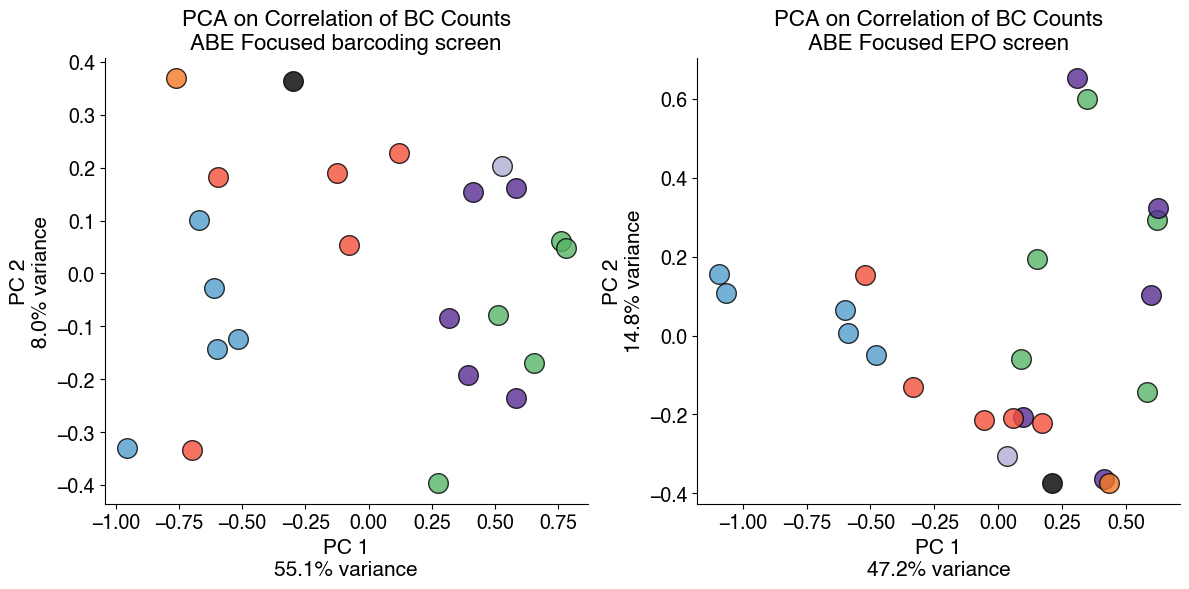

In [15]:
def pca_scatter(data, ax, title, palette):
    """
    data: dataframe to compute correlation and PCA
    ax: subplot axis
    title: subplot title
    palette: list of colors for each point
    """

    # PCA on correlation matrix
    pca = PCA(n_components=2)
    Xt = pca.fit_transform(data.corr(method='spearman'))

    # scatter points
    for i in range(len(Xt)):
        ax.scatter(
            Xt[i][0], Xt[i][1],
            edgecolor='black',
            s=200,
            alpha=.8,
            c=palette[i]
        )

    # explained variance
    var = pca.explained_variance_ratio_

    ax.set_xlabel(f'PC 1\n{np.round(var[0]*100, 1)}% variance', fontsize=15)
    ax.set_ylabel(f'PC 2\n{np.round(var[1]*100, 1)}% variance', fontsize=15)

    ax.spines[['top', 'right']].set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_title(title, fontsize=16)

yellows = sns.color_palette('Oranges').as_hex()
blues   = sns.color_palette('Blues').as_hex()
greens  = sns.color_palette('Greens').as_hex()
reds    = sns.color_palette('Reds').as_hex()
purples = sns.color_palette('Purples').as_hex()

palette = [
    greens[3], greens[3], greens[3], greens[3], greens[3],   # bone marrow
    purples[5], purples[5], purples[5], purples[5], purples[5], # d15
    purples[2],             # d5
    yellows[3],             # input
    'black',                # plasmid
    reds[3], reds[3], reds[3], reds[3], reds[3],   # men
    blues[3], blues[3], blues[3], blues[3], blues[3] # spleen
]
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=False, sharey=False)
pca_scatter(ABE_BC_COUNTS,  axes[0], "PCA on Correlation of BC Counts\nABE Focused barcoding screen", palette)
pca_scatter(ABE_EPO_COUNTS, axes[1], "PCA on Correlation of BC Counts\nABE Focused EPO screen",      palette)

fig.tight_layout()
fig.savefig('figures/pca_focused_abe.pdf')
plt.show()


## Skew ratio

In [4]:
ABE_BC_samps = list(ABE_BC_COUNTS.columns)
ABE_EPO_samps = list(ABE_EPO_COUNTS.columns)

BC_skew = []
EPO_skew = []
for i in ABE_BC_samps:
    d = sorted(np.asarray(ABE_BC_COUNTS[i]))
    ten = int(.1*len(d))
    ninety = int(.9*len(d))
    if d[ten]>0:
        BC_skew.append(d[ninety]/d[ten])
    else:
        BC_skew.append(d[ninety])

for i in ABE_EPO_samps:
    d = sorted(np.asarray(ABE_EPO_COUNTS[i]))
    ten = int(.1*len(d))
    ninety = int(.9*len(d))
    if d[ten]>0:
        EPO_skew.append(d[ninety]/d[ten])
    else:
        EPO_skew.append(d[ninety])

BC_skew_df = pd.DataFrame(dict(zip(['Sample', '90/10 Skew Ratio'], [ABE_BC_samps, BC_skew])))
EPO_skew_df = pd.DataFrame(dict(zip(['Sample', '90/10 Skew Ratio'], [ABE_EPO_samps, EPO_skew])))

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


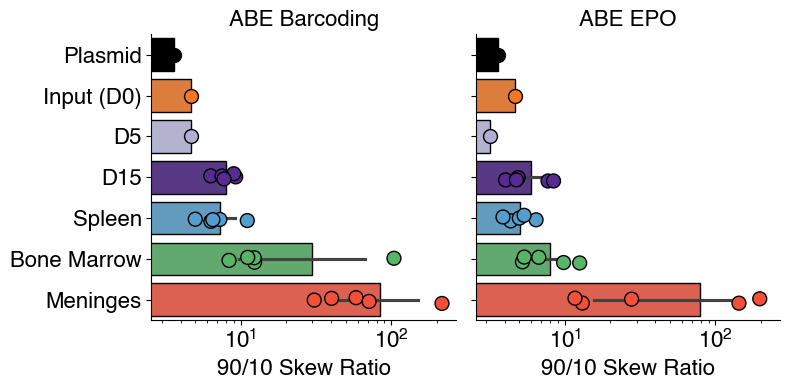

In [11]:
ax_dict_BC = dict(
    zip(['bm1', 'bm2', 'bm3', 'bm4', 'bm5', 
        'd15-rep1', 'd15-rep2', 'd15-rep3','d15-rep4', 'd15-rep5', 
        'd5',
        'input',
        'lib',
        'men1', 'men2', 'men3','men4', 'men5', 
        'spleen1', 'spleen2', 'spleen3', 'spleen4', 'spleen5'], 
       [5,5,5,5,5,
        3,3,3,3,3,
        2,
        1,
        0,
        6,6,6,6,6,
        4,4,4,4,4]))

ax_dict_EPO = dict(
    zip(['bm1', 'bm2', 'bm3', 'bm4', 'bm5', 
        'd15-rep1', 'd15-rep2', 'd15-rep3','d15-rep4', 'd15-rep5', 
        'd5',
        'input',
        'lib',
        'men1', 'men2', 'men3','men4', 'men5', 
        'spleen1', 'spleen2', 'spleen3', 'spleen4', 'spleen5'], 
       [5,5,5,5,5,
        3,3,3,3,3,
        2,
        1,
        0,
        6,6,6,6,6,
        4,4,4,4,4]))

d2 = dict(zip([0,1,2,3,4,5,6],['Plasmid', 'Input (D0)','D5', 'D15', 'Spleen', 'Bone Marrow', 'Meninges']))

BC_name = []
EPO_name = []
for i, val in BC_skew_df.iterrows():
    s = val['Sample']
    s2 = ax_dict_BC[s]
    s3 = d2[s2]
    BC_name.append(s3)

for i, val in EPO_skew_df.iterrows():
    s = val['Sample']
    s2 = ax_dict_EPO[s]
    s3 = d2[s2]
    EPO_name.append(s3)

BC_skew_df['Name'] = BC_name
EPO_skew_df['Name'] = EPO_name

fig, ax = plt.subplots(1,2, figsize=(8,4), sharey=True, sharex=True)

palette = ['black', yellows[3], purples[2], purples[5], blues[3], greens[3], reds[3]]
order=['Plasmid', 'Input (D0)', 'D5', 'D15', 'Spleen', 'Bone Marrow', 'Meninges']

sns.barplot(data = BC_skew_df, y='Name', x='90/10 Skew Ratio', ax=ax[0], edgecolor='black', linewidth=1, palette = palette, order=order)
sns.barplot(data = EPO_skew_df, y='Name', x='90/10 Skew Ratio', ax=ax[1], edgecolor='black', linewidth=1, palette = palette,order=order)

sns.stripplot(data = BC_skew_df, y='Name', x='90/10 Skew Ratio', ax=ax[0], edgecolor='black', linewidth=1, palette = palette, order=order, s=10)
sns.stripplot(data = EPO_skew_df, y='Name', x='90/10 Skew Ratio', ax=ax[1], edgecolor='black', linewidth=1, palette = palette, order=order, s=10)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].set_ylabel('')
ax[1].set_ylabel('')

ax[0].spines[['top', 'right']].set_visible(False)
ax[0].tick_params(axis='both', which='major', labelsize=16,)
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].tick_params(axis='both', which='major', labelsize=16,)
ax[0].set_title('ABE Barcoding', fontsize=16)
ax[1].set_title('ABE EPO', fontsize=16)
ax[0].set_xlabel('90/10 Skew Ratio', fontsize=16)
ax[1].set_xlabel('90/10 Skew Ratio', fontsize=16)

fig.tight_layout()
plt.savefig('figures/focused_skew_abe.pdf')
plt.show()

In [ ]:
CBE_BC_samps = list(CBE_BC_COUNTS.columns)
CBE_EPO_samps = list(CBE_EPO_COUNTS.columns)

BC_skew = []
EPO_skew = []
for i in CBE_BC_samps:
    d = sorted(np.asarray(CBE_BC_COUNTS[i]))
    ten = int(.1*len(d))
    ninety = int(.9*len(d))
    if d[ten]>0:
        BC_skew.append(d[ninety]/d[ten])
    else:
        BC_skew.append(d[ninety])

for i in CBE_EPO_samps:
    d = sorted(np.asarray(CBE_EPO_COUNTS[i]))
    ten = int(.1*len(d))
    ninety = int(.9*len(d))
    if d[ten]>0:
        EPO_skew.append(d[ninety]/d[ten])
    else:
        EPO_skew.append(d[ninety])

BC_skew_df = pd.DataFrame(dict(zip(['Sample', '90/10 Skew Ratio'], [CBE_BC_samps, BC_skew])))
EPO_skew_df = pd.DataFrame(dict(zip(['Sample', '90/10 Skew Ratio'], [CBE_EPO_samps, EPO_skew])))

In [ ]:
ax_dict_BC = dict(
    zip(['bm1', 'bm2', 'bm3', 'bm4', 'bm5', 
        'd15-rep1', 'd15-rep2', 'd15-rep3','d15-rep4', 'd15-rep5', 
        'd5-rep1', 'd5-rep2', 'd5-rep3','d5-rep4', 'd5-rep5', 
        'input-rep1','input-rep2','input-rep3','input-rep4','input-rep5',
        'lib',
        'men1', 'men2', 'men3','men4', 'men5', 
        'spleen1', 'spleen2', 'spleen3', 'spleen4', 'spleen5'], 
       [5,5,5,5,5,
        3,3,3,3,3,
        2,2,2,2,2,
        1,1,1,1,1,
        0,
        6,6,6,6,6,
        4,4,4,4,4]))

ax_dict_EPO = dict(
    zip(['bm1', 'bm2', 'bm3', 'bm4', 'bm5', 
        'd15-rep1', 'd15-rep2', 'd15-rep3','d15-rep4', 'd15-rep5', 
        'd5-rep1', 'd5-rep2', 'd5-rep3','d5-rep4', 'd5-rep5', 
        'input-rep1','input-rep2','input-rep3','input-rep4','input-rep5',
        'lib',
        'men1', 'men2', 'men3','men4', 'men5', 
        'spleen1', 'spleen2', 'spleen3', 'spleen4', 'spleen5'], 
       [5,5,5,5,5,
        3,3,3,3,3,
        2,2,2,2,2,
        1,1,1,1,1,
        0,
        6,6,6,6,6,
        4,4,4,4,4]))

d2 = dict(zip([0,1,2,3,4,5,6],['Plasmid', 'Input (D0)','D5', 'D15', 'Spleen', 'Bone Marrow', 'Meninges']))

BC_name = []
EPO_name = []
for i, val in BC_skew_df.iterrows():
    s = val['Sample']
    s2 = ax_dict_BC[s]
    s3 = d2[s2]
    BC_name.append(s3)

for i, val in EPO_skew_df.iterrows():
    s = val['Sample']
    s2 = ax_dict_EPO[s]
    s3 = d2[s2]
    EPO_name.append(s3)

BC_skew_df['Name'] = BC_name
EPO_skew_df['Name'] = EPO_name

/var/folders/rl/65f1zcd575n092yn3xlqlqfw0000gn/T/ipykernel_29788/412985586.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = BC_skew_df, y='Name', x='90/10 Skew Ratio', ax=ax[0], edgecolor='black', linewidth=1, palette = palette, order=order)
/var/folders/rl/65f1zcd575n092yn3xlqlqfw0000gn/T/ipykernel_29788/412985586.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = EPO_skew_df, y='Name', x='90/10 Skew Ratio', ax=ax[1], edgecolor='black', linewidth=1, palette = palette,order=order)
/var/folders/rl/65f1zcd575n092yn3xlqlqfw0000gn/T/ipykernel_29788/412985586.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assig

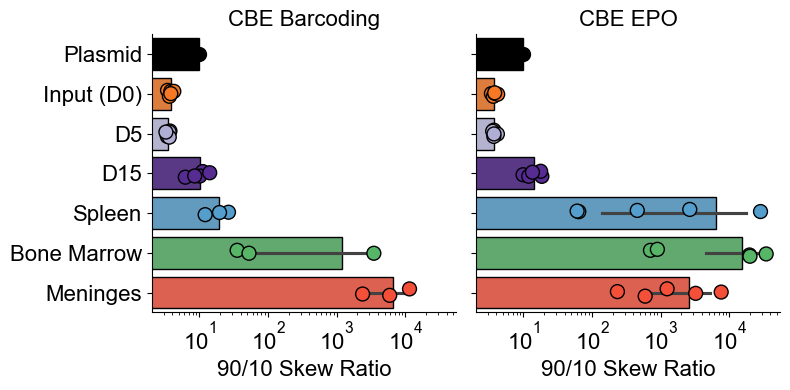

In [ ]:

fig, ax = plt.subplots(1,2, figsize=(8,4), sharey=True, sharex=True)

blues = blues.as_hex()
greens = greens.as_hex()
reds = reds.as_hex()
yellows = yellows.as_hex()

palette = ['black', yellows[3], purples[2], purples[5], blues[3], greens[3], reds[3]]
order=['Plasmid', 'Input (D0)', 'D5', 'D15', 'Spleen', 'Bone Marrow', 'Meninges']

sns.barplot(data = BC_skew_df, y='Name', x='90/10 Skew Ratio', ax=ax[0], edgecolor='black', linewidth=1, palette = palette, order=order)
sns.barplot(data = EPO_skew_df, y='Name', x='90/10 Skew Ratio', ax=ax[1], edgecolor='black', linewidth=1, palette = palette,order=order)

sns.stripplot(data = BC_skew_df, y='Name', x='90/10 Skew Ratio', ax=ax[0], edgecolor='black', linewidth=1, palette = palette, order=order, s=10)
sns.stripplot(data = EPO_skew_df, y='Name', x='90/10 Skew Ratio', ax=ax[1], edgecolor='black', linewidth=1, palette = palette, order=order, s=10)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].set_ylabel('')
ax[1].set_ylabel('')

ax[0].spines[['top', 'right']].set_visible(False)
ax[0].tick_params(axis='both', which='major', labelsize=16,)
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].tick_params(axis='both', which='major', labelsize=16,)
ax[0].set_title('CBE Barcoding', fontsize=16)
ax[1].set_title('CBE EPO', fontsize=16)
ax[0].set_xlabel('90/10 Skew Ratio', fontsize=16)
ax[1].set_xlabel('90/10 Skew Ratio', fontsize=16)

fig.tight_layout()
plt.savefig('figures/focused_skew_cbe.pdf')

## Histogram of editing efficiency D5

In [17]:
d5_ABE = pd.read_csv('MLE/focused/ABE_EPO/d5.csv').rename(columns = {'Guide_ID':'gRNA_id'})
d5_CBE = pd.read_csv('MLE/focused/CBE_EPO/d5.csv').rename(columns = {'Guide_ID':'gRNA_id'})

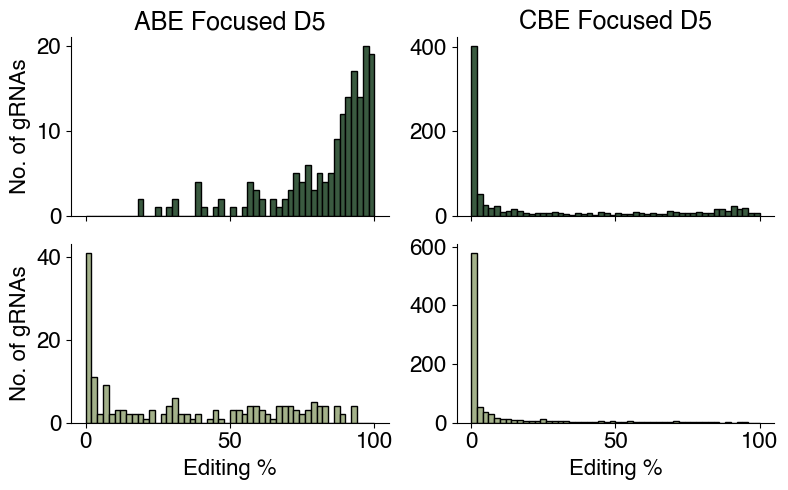

In [20]:
ABE_target_gudies = FOCUSED[(FOCUSED['Editor']=='ABE') & (FOCUSED['classification']=='targeting guide')]
CBE_target_gudies = FOCUSED[(FOCUSED['Editor']=='CBE') & (FOCUSED['classification'].isin(['targeting guide','essential truncation guide']))]

ABE_edits = pd.merge(d5_ABE, ABE_target_gudies, on='gRNA_id')
CBE_edits = pd.merge(d5_CBE, CBE_target_gudies, on='gRNA_id')

fig, ax = plt.subplots(2,2,figsize=(8,5), sharex=True, sharey=False)

ax[0][0].hist(ABE_edits['target_base_edit_perc'], bins=np.linspace(0,100,51), linewidth=1, color='#3a5a40', edgecolor='black')
ax[1][0].hist(ABE_edits['corr_perc'], bins=np.linspace(0,100,51), linewidth=1, color='#a3b18a', edgecolor='black')

ax[0][1].hist(CBE_edits['target_base_edit_perc'], bins=np.linspace(0,100,51), color='#3a5a40', linewidth=1, edgecolor='black')
ax[1][1].hist(CBE_edits['corr_perc'], bins=np.linspace(0,100,51), linewidth=1, color='#a3b18a', edgecolor='black')
ax[0][0].spines[['top', 'right']].set_visible(False)
ax[0][0].tick_params(axis='both', which='major', labelsize=16,)
ax[1][0].spines[['top', 'right']].set_visible(False)
ax[1][0].tick_params(axis='both', which='major', labelsize=16,)
ax[0][1].spines[['top', 'right']].set_visible(False)
ax[0][1].tick_params(axis='both', which='major', labelsize=16,)
ax[1][1].spines[['top', 'right']].set_visible(False)
ax[1][1].tick_params(axis='both', which='major', labelsize=16,)
ax[0][0].set_ylabel('No. of gRNAs', fontsize=16)
ax[1][0].set_ylabel('No. of gRNAs', fontsize=16)
ax[1][1].set_xlabel('Editing %', fontsize=16)
ax[1][0].set_xlabel('Editing %', fontsize=16)

ax[0][0].set_title('ABE Focused D5', fontsize=18)
ax[0][1].set_title('CBE Focused D5', fontsize=18)

fig.tight_layout()
# fig.savefig('figures/hist_d5_editing_perc.pdf')

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


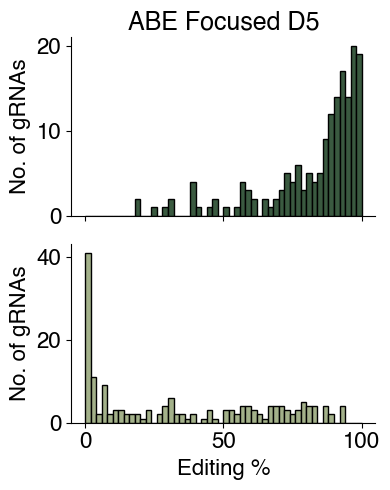

In [25]:
ABE_target_gudies = FOCUSED[(FOCUSED['Editor']=='ABE') & (FOCUSED['classification']=='targeting guide')]
#CBE_target_gudies = FOCUSED[(FOCUSED['Editor']=='CBE') & (FOCUSED['classification'].isin(['targeting guide','essential truncation guide']))]

ABE_edits = pd.merge(d5_ABE, ABE_target_gudies, on='gRNA_id')
# CBE_edits = pd.merge(d5_CBE, CBE_target_gudies, on='gRNA_id')

fig, ax = plt.subplots(2,1,figsize=(4,5), sharex=True, sharey=False)

ax[0].hist(ABE_edits['target_base_edit_perc'], bins=np.linspace(0,100,51), linewidth=1, color='#3a5a40', edgecolor='black')
ax[1].hist(ABE_edits['corr_perc'], bins=np.linspace(0,100,51), linewidth=1, color='#a3b18a', edgecolor='black')

ax[0].spines[['top', 'right']].set_visible(False)
ax[0].tick_params(axis='both', which='major', labelsize=16,)
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].tick_params(axis='both', which='major', labelsize=16,)

ax[0].set_ylabel('No. of gRNAs', fontsize=16)
ax[1].set_ylabel('No. of gRNAs', fontsize=16)
ax[1].set_xlabel('Editing %', fontsize=16)
ax[1].set_xlabel('Editing %', fontsize=16)

ax[0].set_title('ABE Focused D5', fontsize=18)
fig.tight_layout()
fig.savefig('figures/focused_abe_hist_editing_d5.pdf')

# Focused screen result analysis

Venn plot of two methods, focused

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


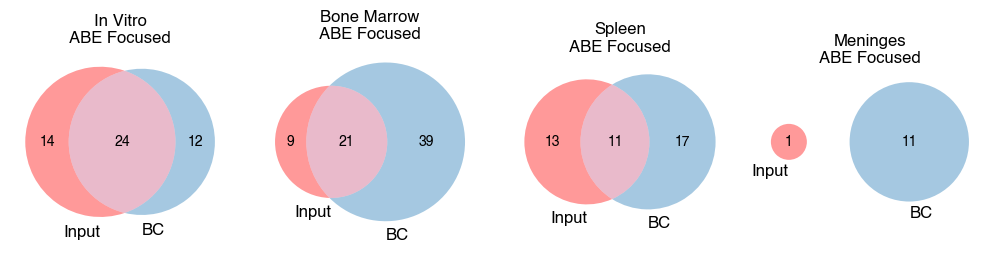

In [ ]:
FDR_cut = .1
editing_cut = 20
from matplotlib_venn import venn2

a1 = LFC_ABE_FOCUSED[LFC_ABE_FOCUSED['target_base_edit_perc'] > editing_cut].reset_index(drop=True)
a2 = LFC_ABE_FOCUSED_VS_BC[LFC_ABE_FOCUSED_VS_BC['target_base_edit_perc_epo'] > editing_cut].reset_index(drop=True)

fig, axe =plt.subplots(1,4, figsize=(10,6))

for idx,tissue in enumerate(['d15','bm','spleen','men']):
    a11 = a1[a1[f'FDR_{tissue}_fishers'] < FDR_cut].reset_index(drop=True)
    a22 = a2[a2[f'FDR_{tissue}_fishers'] < FDR_cut].reset_index(drop=True)

    a111 = a11[(a11[f'LFC_median_{tissue}'] > 1) | (a11[f'LFC_median_{tissue}'] < -1)].reset_index(drop=True)
    a222 = a22[(a22[f'LFC_median_{tissue}'] > 1) | (a22[f'LFC_median_{tissue}'] < -1)].reset_index(drop=True)

    venn2([set(a111['gRNA_id']), set(a222['gRNA_id'])], set_labels=('Input', 'BC'), set_colors=("red", "tab:blue"), ax=axe[idx])
    axe[idx].set_title(f'{name_dict[tissue]}\nABE Focused')
fig.tight_layout()
plt.savefig('figures/venn_abe_focused_vs_bc.pdf')
plt.show()

# Distribution of non-target LFC. 

NOTE: Need to be updated.

# Compared distribution of non-target LFC. 

NOTE: Need to be updated.

## correlation betwee OG and focused screen, ABE

In [ ]:
LFC_ABE_OG = pd.read_csv('LFC-FDR/og/ABE_LFC_FDR_df_og.csv')
LFC_ABE_FOCUSED = pd.read_csv('LFC-FDR/focused/ABE_LFC_FDR_df_focused.csv')
LFC_ABE_FOCUSED_VS_BC = pd.read_csv('LFC-FDR/focused/ABE_LFC_FDR_df_vs_bc.csv')

In [ ]:
 #calculating z-scores for standardization of comparison
samples_focused = ['bm', 'd15', 'd5', 'men', 'spleen']
samples_og = ['bonemarrow','meninges','d15','d5','spleen']

def z_score(df, samples):
    for x in samples:
        col_median = f'LFC_median_{x}'
        avg = np.average(df[col_median])
        std = np.std(df[col_median])
        z_scores = (df[col_median]-avg)/std
        df[f'z_score_{x}'] = z_scores
    return df

LFC_ABE_FOCUSED = z_score(LFC_ABE_FOCUSED, samples_focused)
#LFC_CBE = z_score(LFC_CBE, samples)
LFC_ABE_OG = z_score(LFC_ABE_OG, samples_og)
#LFC_CBE_OG = z_score(LFC_CBE_OG, samples_og)
LFC_ABE_FOCUSED_VS_BC = z_score(LFC_ABE_FOCUSED_VS_BC, samples_focused)

In [ ]:
col_og = ['gRNA_id','Gene','LFC_median_spleen','LFC_median_bonemarrow','LFC_median_meninges','LFC_median_d15', 'z_score_spleen','z_score_bonemarrow','z_score_meninges','z_score_d15']
col_focused = ['gRNA_id','Gene','LFC_median_spleen','LFC_median_bm','LFC_median_men','LFC_median_d15','z_score_spleen','z_score_bm','z_score_men','z_score_d15']

In [ ]:
name_dict = dict(zip(['d15','bm','spleen','men'],[
    'In Vitro',
    'Bone Marrow',
    'Spleen','Meninges'
]))

In [ ]:
df = LFC_ABE_OG[col_og]
df.columns = ['gRNA_id','Gene','og_spleen','og_bm','og_men','og_d15', 'og_z_score_spleen','og_z_score_bm','og_z_score_men','og_z_score_d15']

In [ ]:
df_2 = LFC_ABE_FOCUSED[col_focused]
df_2.columns = ['gRNA_id','Gene','focused_spleen','focused_bm','focused_men','focused_d15','focused_z_score_spleen','focused_z_score_bm','focused_z_score_men','focused_z_score_d15']
df = pd.merge(df, df_2, on=['gRNA_id','Gene'])

df_3 = LFC_ABE_FOCUSED_VS_BC[col_focused]
df_3.columns = ['gRNA_id','Gene','vs_bc_spleen','vs_bc_bm','vs_bc_men','vs_bc_d15','vs_bc_z_score_spleen','vs_bc_z_score_bm','vs_bc_z_score_men','vs_bc_z_score_d15']   
df = pd.merge(df, df_3, on=['gRNA_id','Gene'])

df

,gRNA_id,Gene,og_spleen,og_bm,og_men,og_d15,og_z_score_spleen,og_z_score_bm,og_z_score_men,og_z_score_d15,...,focused_z_score_men,focused_z_score_d15,vs_bc_spleen,vs_bc_bm,vs_bc_men,vs_bc_d15,vs_bc_z_score_spleen,vs_bc_z_score_bm,vs_bc_z_score_men,vs_bc_z_score_d15
0,gRNA_2,Abl1,1.434236,1.495161,1.249886,-0.889060,1.568088,1.929737,1.794715,-1.561318,...,0.642984,-4.016517,-0.320979,-0.680754,3.385965,-0.263412,-0.630588,-0.898736,2.156949,-0.534225
1,gRNA_85,Akt1,-0.030999,1.885135,-1.336062,-0.160383,0.041922,2.361269,-0.486647,-0.422771,...,-0.494536,0.922055,0.340899,-0.688184,0.369454,-0.105014,0.443609,-0.906237,0.152840,-0.313641
2,gRNA_871,Arid2,1.222135,0.744087,-1.167098,0.540824,1.347166,1.098624,-0.337584,0.672854,...,0.190933,0.940937,-0.462095,0.162476,-2.187726,0.893646,-0.859612,-0.047438,-1.546099,1.077087
3,gRNA_895,Arid5b,1.887682,2.830944,1.147635,2.028719,2.040389,3.407869,1.704508,2.997668,...,1.161259,1.333232,1.177462,3.041594,0.050392,1.422703,1.801310,2.859225,-0.059138,1.813848
4,gRNA_896,Arid5b,1.828098,2.328855,0.250466,1.000534,1.978328,2.852274,0.913012,1.391145,...,0.726268,0.704551,0.515846,0.314315,1.456724,0.776852,0.727539,0.105853,0.875200,0.914439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,gRNA_12602,Trp53,0.180680,1.025775,-0.671477,-0.047426,0.262404,1.410330,0.099660,-0.246278,...,-0.296277,-0.860060,-0.180025,0.695829,-0.582416,-0.532603,-0.401826,0.491017,-0.479563,-0.909098
166,gRNA_12604,Trp53,2.321278,1.526947,0.762700,1.566673,2.492016,1.964910,1.364913,2.275728,...,0.891018,0.449552,0.723427,-0.197588,2.269225,0.967740,1.064432,-0.410947,1.415010,1.180270
167,gRNA_12652,Trp53bp1,0.283331,1.358787,-0.732068,-0.137931,0.369323,1.778830,0.046206,-0.387691,...,0.588415,-0.760602,-0.121973,-0.495748,-0.128449,-0.668991,-0.307611,-0.711959,-0.177957,-1.099031
168,gRNA_12831,Tsc1,0.513632,0.850011,-1.221844,1.278838,0.609201,1.215835,-0.385882,1.825990,...,-0.343392,0.808649,-0.281691,1.432865,1.609559,0.270424,-0.566826,1.235105,0.976740,0.209192


In [ ]:
df[['vs_bc_spleen','og_spleen','focused_spleen']]

,vs_bc_spleen,og_spleen,focused_spleen
0,-0.320979,1.434236,-0.274717
1,0.340899,-0.030999,0.178861
2,-0.462095,1.222135,-0.493381
3,1.177462,1.887682,0.769553
4,0.515846,1.828098,0.630809
...,...,...,...
165,-0.180025,0.180680,0.218437
166,0.723427,2.321278,0.897211
167,-0.121973,0.283331,0.104603
168,-0.281691,0.513632,-0.267387


Spearman Correlation Coefficient: 0.3807
3.0234037346773315e-07
Pearson Correlation Coefficient: 0.4896
1.2426578740864967e-11
Spearman Correlation Coefficient: 0.2370
0.0018630663501660147
Pearson Correlation Coefficient: 0.3201
2.0879695812819375e-05
Spearman Correlation Coefficient: 0.0897
0.24470881462012406
Pearson Correlation Coefficient: 0.1097
0.15431006000426084
Spearman Correlation Coefficient: 0.2333
0.002195662237976843
Pearson Correlation Coefficient: 0.3043
5.461050976464284e-05


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


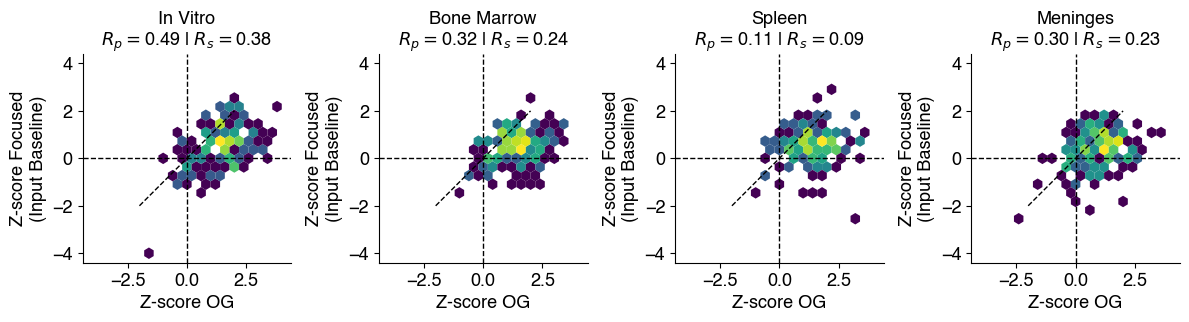

In [ ]:

suffix_1, suffix_2 = 'focused', 'og'

fig, ax = plt.subplots(1, 4, figsize=(12,4))

for i, tissue in enumerate(['d15','bm','spleen','men']):
    ax[i].set_aspect('equal')
    corr_spearman, p_value_spearman = scipy.stats.spearmanr(df[f'{suffix_1}_z_score_{tissue}'], df[f'{suffix_2}_z_score_{tissue}'])
    print("Spearman Correlation Coefficient: {:.4f}".format(corr_spearman))
    print(p_value_spearman)
    corr_pearson, p_value_pearson = scipy.stats.pearsonr(df[f'{suffix_1}_z_score_{tissue}'], df[f'{suffix_2}_z_score_{tissue}'])
    print("Pearson Correlation Coefficient: {:.4f}".format(corr_pearson))
    print(p_value_pearson)
    pear = "{:.2f}".format(corr_pearson)
    spear = "{:.2f}".format(corr_spearman)
    ax[i].hexbin(df[f'{suffix_2}_z_score_{tissue}'], df[f'{suffix_1}_z_score_{tissue}'],  bins='log',gridsize=20, linewidth=0, extent = (-4, 4, -4, 4))
    ax[i].set_title(f'{name_dict[tissue]}\n$R_p = $' + f'{pear}' + ' | $R_s = $' + f'{spear}', fontsize=13)
    ax[i].plot([-2,2],[-2,2], linestyle='dashed', color='black', linewidth=1)
    ax[i].axhline(y=0, linestyle='dashed', color='black', linewidth=1)
    ax[i].axvline(x=0, linestyle='dashed', color='black', linewidth=1)
    ax[i].set_xlabel(f'Z-score OG', fontsize=13)
    ax[i].set_ylabel(f'Z-score Focused\n(Input Baseline)', fontsize=13)
    ax[i].spines[['top', 'right']].set_visible(False)
    ax[i].tick_params(axis='both', which='major', labelsize=13,)

fig.tight_layout()
plt.savefig(f'figures/corr_og_vs_focused.pdf')
plt.show()

Spearman Correlation Coefficient: 0.6749
6.020173363207839e-24
Pearson Correlation Coefficient: 0.6977
4.0866650462911066e-26
Spearman Correlation Coefficient: 0.6294
3.840296171906902e-20
Pearson Correlation Coefficient: 0.6182
2.655562904025872e-19
Spearman Correlation Coefficient: 0.7031
1.1649674811993628e-26
Pearson Correlation Coefficient: 0.7732
4.69721361094338e-35
Spearman Correlation Coefficient: 0.5349
5.713705524249018e-14
Pearson Correlation Coefficient: 0.5277
1.41532383556805e-13


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


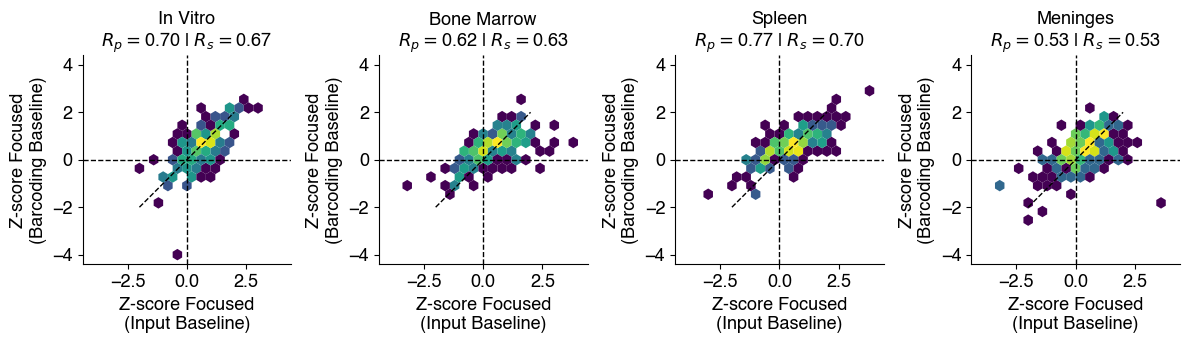

In [ ]:

suffix_1, suffix_2 = 'focused', 'vs_bc'

fig, ax = plt.subplots(1, 4, figsize=(12,4))

for i, tissue in enumerate(['d15','bm','spleen','men']):
    ax[i].set_aspect('equal')
    corr_spearman, p_value_spearman = scipy.stats.spearmanr(df[f'{suffix_1}_z_score_{tissue}'], df[f'{suffix_2}_z_score_{tissue}'])
    print("Spearman Correlation Coefficient: {:.4f}".format(corr_spearman))
    print(p_value_spearman)
    corr_pearson, p_value_pearson = scipy.stats.pearsonr(df[f'{suffix_1}_z_score_{tissue}'], df[f'{suffix_2}_z_score_{tissue}'])
    print("Pearson Correlation Coefficient: {:.4f}".format(corr_pearson))
    print(p_value_pearson)
    pear = "{:.2f}".format(corr_pearson)
    spear = "{:.2f}".format(corr_spearman)
    ax[i].hexbin(df[f'{suffix_2}_z_score_{tissue}'], df[f'{suffix_1}_z_score_{tissue}'],  bins='log',gridsize=20, linewidth=0, extent = (-4, 4, -4, 4))
    ax[i].set_title(f'{name_dict[tissue]}\n$R_p = $' + f'{pear}' + ' | $R_s = $' + f'{spear}', fontsize=13)
    ax[i].plot([-2,2],[-2,2], linestyle='dashed', color='black', linewidth=1)
    ax[i].axhline(y=0, linestyle='dashed', color='black', linewidth=1)
    ax[i].axvline(x=0, linestyle='dashed', color='black', linewidth=1)
    ax[i].set_xlabel(f'Z-score Focused\n(Input Baseline)', fontsize=13)
    ax[i].set_ylabel(f'Z-score Focused\n(Barcoding Baseline)', fontsize=13)
    ax[i].spines[['top', 'right']].set_visible(False)
    ax[i].tick_params(axis='both', which='major', labelsize=13,)

fig.tight_layout()
plt.savefig(f'figures/corr_focused_vs_bc.pdf')
plt.show()

Spearman Correlation Coefficient: 0.4479
9.1381635387533e-10
Pearson Correlation Coefficient: 0.4561
4.0759812406537963e-10
Spearman Correlation Coefficient: 0.1818
0.017670768310011523
Pearson Correlation Coefficient: 0.2620
0.0005588517215535056
Spearman Correlation Coefficient: 0.1569
0.04095772364120062
Pearson Correlation Coefficient: 0.1463
0.05700364504693088
Spearman Correlation Coefficient: 0.2875
0.00014403597661750175
Pearson Correlation Coefficient: 0.3150
2.8617023982477483e-05


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


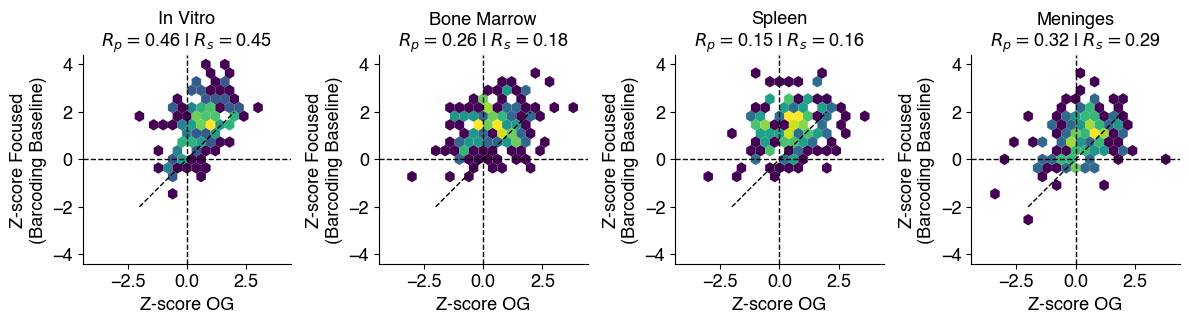

In [ ]:
suffix_1, suffix_2 = 'og', 'vs_bc'

fig, ax = plt.subplots(1, 4, figsize=(12,4))

for i, tissue in enumerate(['d15','bm','spleen','men']):
    ax[i].set_aspect('equal')
    corr_spearman, p_value_spearman = scipy.stats.spearmanr(df[f'{suffix_1}_z_score_{tissue}'], df[f'{suffix_2}_z_score_{tissue}'])
    print("Spearman Correlation Coefficient: {:.4f}".format(corr_spearman))
    print(p_value_spearman)
    corr_pearson, p_value_pearson = scipy.stats.pearsonr(df[f'{suffix_1}_z_score_{tissue}'], df[f'{suffix_2}_z_score_{tissue}'])
    print("Pearson Correlation Coefficient: {:.4f}".format(corr_pearson))
    print(p_value_pearson)
    pear = "{:.2f}".format(corr_pearson)
    spear = "{:.2f}".format(corr_spearman)
    ax[i].hexbin(df[f'{suffix_2}_z_score_{tissue}'], df[f'{suffix_1}_z_score_{tissue}'],  bins='log',gridsize=20, linewidth=0, extent = (-4, 4, -4, 4))
    ax[i].set_title(f'{name_dict[tissue]}\n$R_p = $' + f'{pear}' + ' | $R_s = $' + f'{spear}', fontsize=13)
    ax[i].plot([-2,2],[-2,2], linestyle='dashed', color='black', linewidth=1)
    ax[i].axhline(y=0, linestyle='dashed', color='black', linewidth=1)
    ax[i].axvline(x=0, linestyle='dashed', color='black', linewidth=1)
    ax[i].set_xlabel(f'Z-score OG', fontsize=13)
    ax[i].set_ylabel(f'Z-score Focused\n(Barcoding Baseline)', fontsize=13)
    ax[i].spines[['top', 'right']].set_visible(False)
    ax[i].tick_params(axis='both', which='major', labelsize=13,)

fig.tight_layout()
plt.savefig(f'figures/corr_og_vs_bc.pdf')
plt.show()

# Other code

## P1

In [ ]:
FOCUSED = pd.read_csv('MBESv2_focused.csv')

targ_guides = FOCUSED[(FOCUSED['classification']=='targeting guide')] # & (FOCUSED['legacy']==False)]
len(np.unique(targ_guides['gene_name_m']))

In [ ]:
ABE = FOCUSED[FOCUSED['Editor']=='ABE']
CBE = FOCUSED[FOCUSED['Editor']=='CBE']

In [ ]:
len(ABE)

376

In [ ]:
len(ABE[ABE['classification']=='targeting guide'])

170

In [ ]:
376-170

206

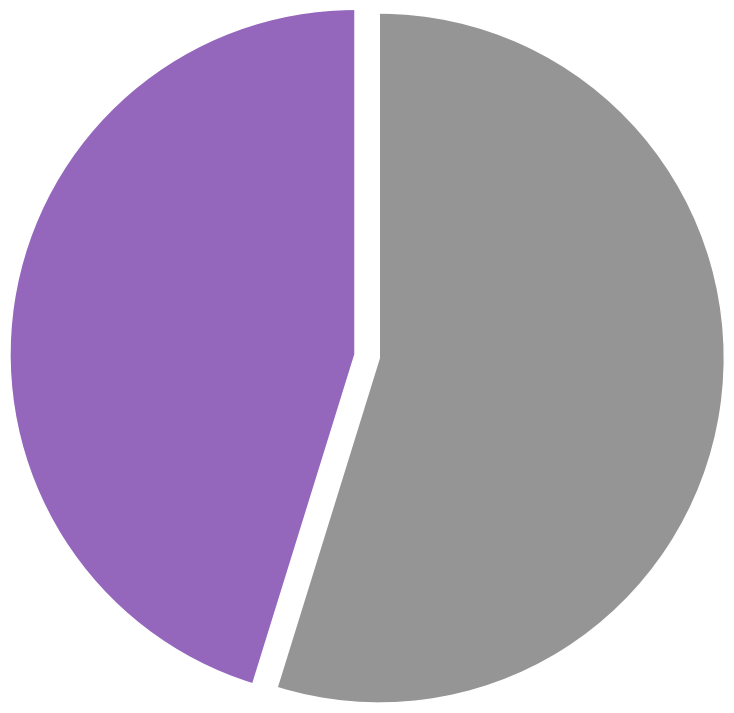

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.axis('equal')
mypie, _ = ax.pie([170, 376-170], radius = 1.4, colors = ['tab:purple',plt.cm.Greys(.5)],
                  explode = (0,.1,), startangle=90)
plt.savefig('figures/ABE_focused_composition_pie.pdf', bbox_inches = 'tight', dpi=300)
plt.setp(mypie, edgecolor='white')
plt.show()

In [ ]:
len(CBE)

1257

In [ ]:
len(CBE[CBE['classification']=='targeting guide'])

782

In [ ]:
CBE['classification'].value_counts()

classification
targeting guide               782
non-targeting control         300
essential truncation guide    115
safe-targeting control         60
Name: count, dtype: int64

In [ ]:
1257-782

475

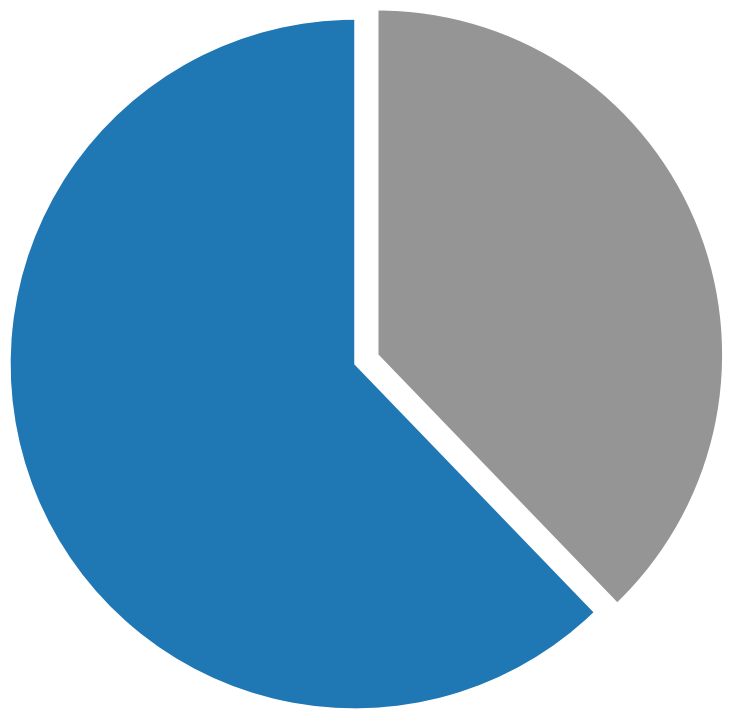

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.axis('equal')
mypie, _ = ax.pie([782, 1257-782], radius = 1.4, colors = ['tab:blue',plt.cm.Greys(.5)],
                  explode = (0,.1,), startangle=90)
plt.savefig('figures/CBE_focused_composition_pie.pdf', bbox_inches = 'tight', dpi=300)
plt.setp(mypie, edgecolor='white')
plt.show()

## P2

A rank-rank scatter of the correlation of LFC between ABE OG associated gRNAs and ABE Focused, for 4 different tissues.

In [ ]:
LFC_ABE_OG = pd.read_csv('LFC-FDR/og/ABE_LFC_FDR_df_og.csv')
LFC_ABE_FOCUSED = pd.read_csv('LFC-FDR/focused/ABE_LFC_FDR_df_focused.csv')
LFC_ABE_FOCUSED_VS_BC = pd.read_csv('LFC-FDR/focused/ABE_LFC_FDR_df_vs_bc.csv')

In [ ]:
#calculating z-scores for standardization of comparison
samples_focused = ['bm', 'd15', 'd5', 'men', 'spleen']
samples_og = ['bonemarrow','meninges','d15','d5','spleen']

def z_score(df, samples):
    for x in samples:
        col_median = f'LFC_median_{x}'
        avg = np.average(df[col_median])
        std = np.std(df[col_median])
        z_scores = (df[col_median]-avg)/std
        df[f'z_score_{x}'] = z_scores
    return df

LFC_ABE_FOCUSED = z_score(LFC_ABE_FOCUSED, samples_focused)
#LFC_CBE = z_score(LFC_CBE, samples)
LFC_ABE_OG = z_score(LFC_ABE_OG, samples_og)
#LFC_CBE_OG = z_score(LFC_CBE_OG, samples_og)
LFC_ABE_FOCUSED_VS_BC = z_score(LFC_ABE_FOCUSED_VS_BC, samples_focused)

In [ ]:
col_og = ['gRNA_id','Gene','LFC_median_spleen','LFC_median_bonemarrow','LFC_median_meninges','LFC_median_d15', 'z_score_spleen','z_score_bonemarrow','z_score_meninges','z_score_d15']
col_focused = ['gRNA_id','Gene','LFC_median_spleen','LFC_median_bm','LFC_median_men','LFC_median_d15','z_score_spleen','z_score_bm','z_score_men','z_score_d15']

In [ ]:
name_dict = dict(zip(['d15','bm','spleen','men'],[
    'In Vitro',
    'Bone Marrow',
    'Spleen','Meninges'
]))

In [ ]:
df = LFC_ABE_OG[col_og]
df.columns = ['gRNA_id','Gene','og_spleen','og_bm','og_men','og_d15', 'og_z_score_spleen','og_z_score_bm','og_z_score_men','og_z_score_d15']

In [ ]:
df_2 = LFC_ABE_FOCUSED[col_focused]
df_2.columns = ['gRNA_id','Gene','focused_spleen','focused_bm','focused_men','focused_d15','focused_z_score_spleen','focused_z_score_bm','focused_z_score_men','focused_z_score_d15']
df = pd.merge(df, df_2, on=['gRNA_id','Gene'])

df_3 = LFC_ABE_FOCUSED_VS_BC[col_focused]
df_3.columns = ['gRNA_id','Gene','vs_bc_spleen','vs_bc_bm','vs_bc_men','vs_bc_d15','vs_bc_z_score_spleen','vs_bc_z_score_bm','vs_bc_z_score_men','vs_bc_z_score_d15']   
df = pd.merge(df, df_3, on=['gRNA_id','Gene'])

df

,gRNA_id,Gene,og_spleen,og_bm,og_men,og_d15,og_z_score_spleen,og_z_score_bm,og_z_score_men,og_z_score_d15,...,focused_z_score_men,focused_z_score_d15,vs_bc_spleen,vs_bc_bm,vs_bc_men,vs_bc_d15,vs_bc_z_score_spleen,vs_bc_z_score_bm,vs_bc_z_score_men,vs_bc_z_score_d15
0,gRNA_2,Abl1,1.434236,1.495161,1.249886,-0.889060,1.568088,1.929737,1.794715,-1.561318,...,0.642984,-4.016517,-0.320979,-0.680754,3.385965,-0.263412,-0.630588,-0.898736,2.156949,-0.534225
1,gRNA_85,Akt1,-0.030999,1.885135,-1.336062,-0.160383,0.041922,2.361269,-0.486647,-0.422771,...,-0.494536,0.922055,0.340899,-0.688184,0.369454,-0.105014,0.443609,-0.906237,0.152840,-0.313641
2,gRNA_871,Arid2,1.222135,0.744087,-1.167098,0.540824,1.347166,1.098624,-0.337584,0.672854,...,0.190933,0.940937,-0.462095,0.162476,-2.187726,0.893646,-0.859612,-0.047438,-1.546099,1.077087
3,gRNA_895,Arid5b,1.887682,2.830944,1.147635,2.028719,2.040389,3.407869,1.704508,2.997668,...,1.161259,1.333232,1.177462,3.041594,0.050392,1.422703,1.801310,2.859225,-0.059138,1.813848
4,gRNA_896,Arid5b,1.828098,2.328855,0.250466,1.000534,1.978328,2.852274,0.913012,1.391145,...,0.726268,0.704551,0.515846,0.314315,1.456724,0.776852,0.727539,0.105853,0.875200,0.914439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,gRNA_12602,Trp53,0.180680,1.025775,-0.671477,-0.047426,0.262404,1.410330,0.099660,-0.246278,...,-0.296277,-0.860060,-0.180025,0.695829,-0.582416,-0.532603,-0.401826,0.491017,-0.479563,-0.909098
166,gRNA_12604,Trp53,2.321278,1.526947,0.762700,1.566673,2.492016,1.964910,1.364913,2.275728,...,0.891018,0.449552,0.723427,-0.197588,2.269225,0.967740,1.064432,-0.410947,1.415010,1.180270
167,gRNA_12652,Trp53bp1,0.283331,1.358787,-0.732068,-0.137931,0.369323,1.778830,0.046206,-0.387691,...,0.588415,-0.760602,-0.121973,-0.495748,-0.128449,-0.668991,-0.307611,-0.711959,-0.177957,-1.099031
168,gRNA_12831,Tsc1,0.513632,0.850011,-1.221844,1.278838,0.609201,1.215835,-0.385882,1.825990,...,-0.343392,0.808649,-0.281691,1.432865,1.609559,0.270424,-0.566826,1.235105,0.976740,0.209192


In [ ]:
LIB = pd.read_csv('MBESv2_CORRECTED.csv')

In [ ]:
df_gene = LIB[['gene_name_h','gene_name_m']].copy()
df_gene.columns = ['gene_name_h','Gene']
df_gene = df_gene.drop_duplicates()

In [ ]:
df = pd.merge(df, df_gene, on='Gene', how='left')

In [ ]:
cosmic = pd.read_csv('source-data/Census_allSun Nov 17 02_26_47 2024.csv').fillna('Undefined')

t_dict = {'TSG':'TSG', 'TSG, fusion':'TSG', 'Undefined':'Undefined', 'fusion':'Undefined', 'oncogene':'Oncogene',
       'oncogene, TSG':'Oncogene/TSG', 'oncogene, TSG, fusion':'Oncogene/TSG', 'oncogene, fusion': 'Oncogene'}

gene_type = []
for i, val in df.iterrows():
    v = val['gene_name_h']
    subset = cosmic[cosmic['Gene Symbol']==v]
    if len(subset)==0:
        gene_type.append('Undefined')
    else:
        v2 = subset['Role in Cancer'].values[0]

        gene_type.append(t_dict[v2])

df['Role in Cancer']=gene_type

Spearman Correlation Coefficient: 0.6749
6.020173363207839e-24
Pearson Correlation Coefficient: 0.6977
4.0866650462911066e-26
Spearman Correlation Coefficient: 0.6294
3.840296171906902e-20
Pearson Correlation Coefficient: 0.6182
2.655562904025872e-19
Spearman Correlation Coefficient: 0.7031
1.1649674811993628e-26
Pearson Correlation Coefficient: 0.7732
4.69721361094338e-35
Spearman Correlation Coefficient: 0.5349
5.713705524249018e-14
Pearson Correlation Coefficient: 0.5277
1.41532383556805e-13


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


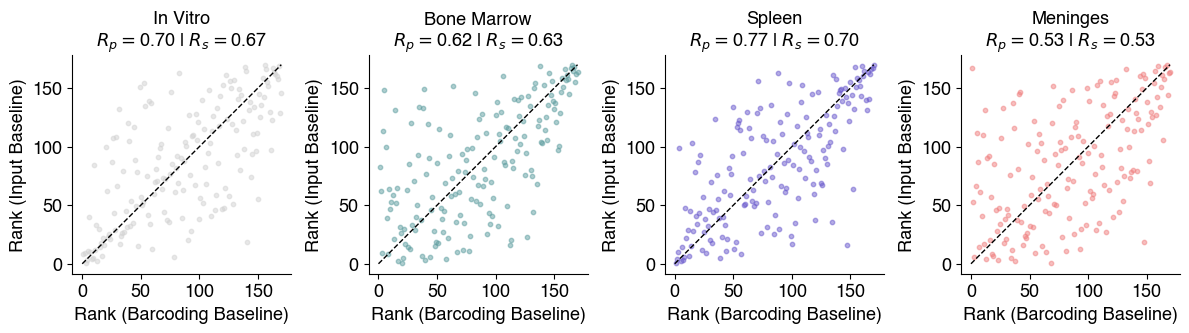

In [ ]:
suffix_1, suffix_2 = 'vs_bc', 'focused'

fig, ax = plt.subplots(1, 4, figsize=(12,4))
color_dict = {'Oncogene':'tab:red', 'Oncogene/TSG':'tab:purple', 'TSG':'tab:blue', 'Undefined':'tab:grey'}
palette = ['lightgrey','cadetblue','slateblue','lightcoral', '#ED6A50',]

for i, tissue in enumerate(['d15','bm','spleen','men']):

    df_rank = df[[f'{suffix_1}_z_score_{tissue}', f'{suffix_2}_z_score_{tissue}', 'gene_name_h', 'Gene', 'Role in Cancer']].copy()
    df_rank = df_rank.sort_values(by=[f'{suffix_1}_z_score_{tissue}'], ascending=False)
    df_rank[f'rank_{suffix_1}'] = range(1, len(df_rank)+1)
    df_rank = df_rank.sort_values(by=[f'{suffix_2}_z_score_{tissue}'], ascending=False)
    df_rank[f'rank_{suffix_2}'] = range(1, len(df_rank)+1)
    df_rank['color'] = [color_dict[i] for i in df_rank['Role in Cancer']]
    
    corr_spearman, p_value_spearman = scipy.stats.spearmanr(df[f'{suffix_1}_z_score_{tissue}'], df[f'{suffix_2}_z_score_{tissue}'])
    print("Spearman Correlation Coefficient: {:.4f}".format(corr_spearman))
    print(p_value_spearman)
    corr_pearson, p_value_pearson = scipy.stats.pearsonr(df[f'{suffix_1}_z_score_{tissue}'], df[f'{suffix_2}_z_score_{tissue}'])
    print("Pearson Correlation Coefficient: {:.4f}".format(corr_pearson))
    print(p_value_pearson)
    pear = "{:.2f}".format(corr_pearson)
    spear = "{:.2f}".format(corr_spearman)

    # then plot ---
    ax[i].set_aspect('equal')
    ax[i].scatter(df_rank[f'rank_{suffix_1}'], df_rank[f'rank_{suffix_2}'], color=palette[i], s=10, alpha = .5)
    ax[i].set_title(f'{name_dict[tissue]}\n$R_p = $' + f'{pear}' + ' | $R_s = $' + f'{spear}', fontsize=13)
    ax[i].plot([0,170],[0,170], linestyle='dashed', color='black', linewidth=1)

    ax[i].set_xlabel(f'Rank (Barcoding Baseline)', fontsize=13)
    ax[i].set_ylabel(f'Rank (Input Baseline)', fontsize=13)

    ax[i].spines[['top', 'right']].set_visible(False)
    ax[i].tick_params(axis='both', which='major', labelsize=13,)
    # scatter plot with color

fig.tight_layout()
plt.savefig(f'figures/corr_vs_bc_vs_focused.pdf')
plt.show()

Spearman Correlation Coefficient: 0.4479
9.1381635387533e-10
Pearson Correlation Coefficient: 0.4561
4.0759812406537963e-10
Spearman Correlation Coefficient: 0.1818
0.017670768310011523
Pearson Correlation Coefficient: 0.2620
0.0005588517215535056
Spearman Correlation Coefficient: 0.1569
0.04095772364120062
Pearson Correlation Coefficient: 0.1463
0.05700364504693088
Spearman Correlation Coefficient: 0.2875
0.00014403597661750175
Pearson Correlation Coefficient: 0.3150
2.8617023982477483e-05


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


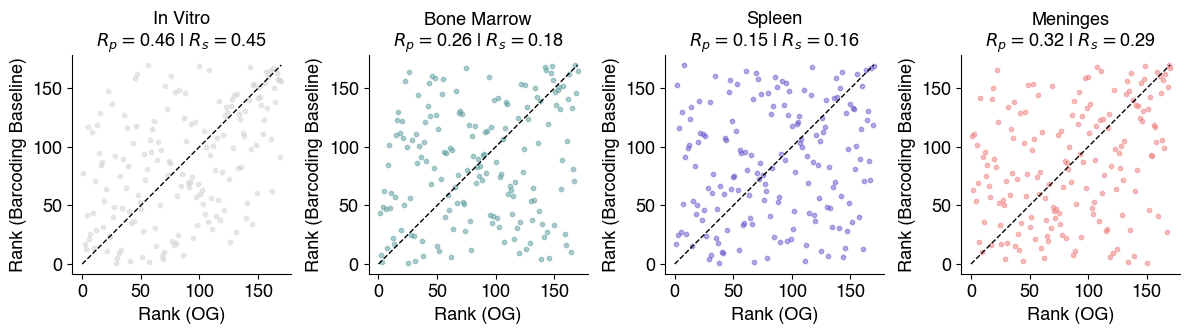

In [ ]:
suffix_1, suffix_2 = 'og', 'vs_bc'
x_label, y_label = 'Rank (OG)', 'Rank (Barcoding Baseline)'

fig, ax = plt.subplots(1, 4, figsize=(12,4))
color_dict = {'Oncogene':'tab:red', 'Oncogene/TSG':'tab:purple', 'TSG':'tab:blue', 'Undefined':'tab:grey'}
palette = ['lightgrey','cadetblue','slateblue','lightcoral', '#ED6A50',]

for i, tissue in enumerate(['d15','bm','spleen','men']):

    df_rank = df[[f'{suffix_1}_z_score_{tissue}', f'{suffix_2}_z_score_{tissue}', 'gene_name_h', 'Gene', 'Role in Cancer']].copy()
    df_rank = df_rank.sort_values(by=[f'{suffix_1}_z_score_{tissue}'], ascending=False)
    df_rank[f'rank_{suffix_1}'] = range(1, len(df_rank)+1)
    df_rank = df_rank.sort_values(by=[f'{suffix_2}_z_score_{tissue}'], ascending=False)
    df_rank[f'rank_{suffix_2}'] = range(1, len(df_rank)+1)
    df_rank['color'] = [color_dict[i] for i in df_rank['Role in Cancer']]
    
    corr_spearman, p_value_spearman = scipy.stats.spearmanr(df[f'{suffix_1}_z_score_{tissue}'], df[f'{suffix_2}_z_score_{tissue}'])
    print("Spearman Correlation Coefficient: {:.4f}".format(corr_spearman))
    print(p_value_spearman)
    corr_pearson, p_value_pearson = scipy.stats.pearsonr(df[f'{suffix_1}_z_score_{tissue}'], df[f'{suffix_2}_z_score_{tissue}'])
    print("Pearson Correlation Coefficient: {:.4f}".format(corr_pearson))
    print(p_value_pearson)
    pear = "{:.2f}".format(corr_pearson)
    spear = "{:.2f}".format(corr_spearman)

    # then plot ---
    ax[i].set_aspect('equal')
    ax[i].scatter(df_rank[f'rank_{suffix_1}'], df_rank[f'rank_{suffix_2}'], color=palette[i], s=10, alpha = .5)
    ax[i].set_title(f'{name_dict[tissue]}\n$R_p = $' + f'{pear}' + ' | $R_s = $' + f'{spear}', fontsize=13)
    ax[i].plot([0,170],[0,170], linestyle='dashed', color='black', linewidth=1)

    ax[i].set_xlabel(x_label, fontsize=13)
    ax[i].set_ylabel(y_label, fontsize=13)

    ax[i].spines[['top', 'right']].set_visible(False)
    ax[i].tick_params(axis='both', which='major', labelsize=13,)
    # scatter plot with color

fig.tight_layout()
plt.savefig(f'figures/corr_og_vs_bc.pdf')
plt.show()

Spearman Correlation Coefficient: 0.3807
3.0234037346773315e-07
Pearson Correlation Coefficient: 0.4896
1.2426578740864967e-11
Spearman Correlation Coefficient: 0.2370
0.0018630663501660147
Pearson Correlation Coefficient: 0.3201
2.0879695812819375e-05
Spearman Correlation Coefficient: 0.0897
0.24470881462012406
Pearson Correlation Coefficient: 0.1097
0.15431006000426084
Spearman Correlation Coefficient: 0.2333
0.002195662237976843
Pearson Correlation Coefficient: 0.3043
5.461050976464284e-05


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


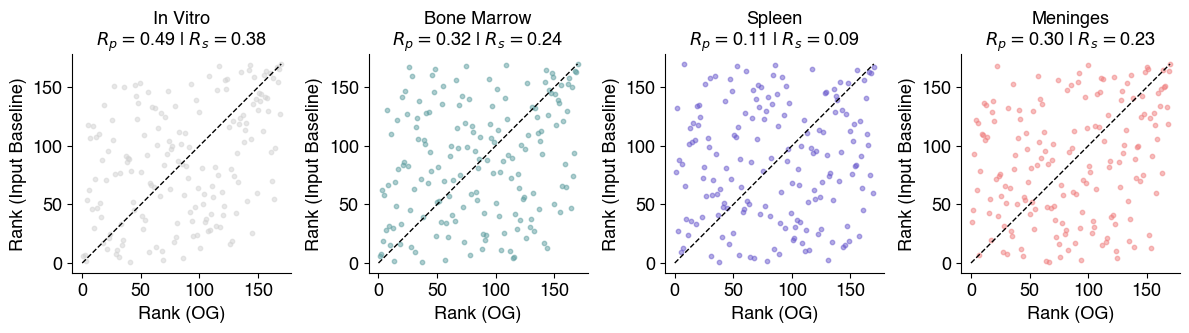

In [ ]:
suffix_1, suffix_2 = 'og', 'focused'
x_label, y_label = 'Rank (OG)', 'Rank (Input Baseline)'

fig, ax = plt.subplots(1, 4, figsize=(12,4))
color_dict = {'Oncogene':'tab:red', 'Oncogene/TSG':'tab:purple', 'TSG':'tab:blue', 'Undefined':'tab:grey'}
palette = ['lightgrey','cadetblue','slateblue','lightcoral', '#ED6A50',]

for i, tissue in enumerate(['d15','bm','spleen','men']):

    df_rank = df[[f'{suffix_1}_z_score_{tissue}', f'{suffix_2}_z_score_{tissue}', 'gene_name_h', 'Gene', 'Role in Cancer']].copy()
    df_rank = df_rank.sort_values(by=[f'{suffix_1}_z_score_{tissue}'], ascending=False)
    df_rank[f'rank_{suffix_1}'] = range(1, len(df_rank)+1)
    df_rank = df_rank.sort_values(by=[f'{suffix_2}_z_score_{tissue}'], ascending=False)
    df_rank[f'rank_{suffix_2}'] = range(1, len(df_rank)+1)
    df_rank['color'] = [color_dict[i] for i in df_rank['Role in Cancer']]
    
    corr_spearman, p_value_spearman = scipy.stats.spearmanr(df[f'{suffix_1}_z_score_{tissue}'], df[f'{suffix_2}_z_score_{tissue}'])
    print("Spearman Correlation Coefficient: {:.4f}".format(corr_spearman))
    print(p_value_spearman)
    corr_pearson, p_value_pearson = scipy.stats.pearsonr(df[f'{suffix_1}_z_score_{tissue}'], df[f'{suffix_2}_z_score_{tissue}'])
    print("Pearson Correlation Coefficient: {:.4f}".format(corr_pearson))
    print(p_value_pearson)
    pear = "{:.2f}".format(corr_pearson)
    spear = "{:.2f}".format(corr_spearman)

    # then plot ---
    ax[i].set_aspect('equal')
    ax[i].scatter(df_rank[f'rank_{suffix_1}'], df_rank[f'rank_{suffix_2}'], color=palette[i], s=10, alpha = .5)
    ax[i].set_title(f'{name_dict[tissue]}\n$R_p = $' + f'{pear}' + ' | $R_s = $' + f'{spear}', fontsize=13)
    ax[i].plot([0,170],[0,170], linestyle='dashed', color='black', linewidth=1)

    ax[i].set_xlabel(x_label, fontsize=13)
    ax[i].set_ylabel(y_label, fontsize=13)

    ax[i].spines[['top', 'right']].set_visible(False)
    ax[i].tick_params(axis='both', which='major', labelsize=13,)
    # scatter plot with color

fig.tight_layout()
plt.savefig(f'figures/corr_og_vs_focused.pdf')
plt.show()